In [40]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re
import nltk

In [41]:
tessdata_dir_config = '--tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata"'
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Read the image

In [42]:
img = cv2.imread('1.jpg')

# Convert the image to gray scale

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Tesseract to do OCR on the image

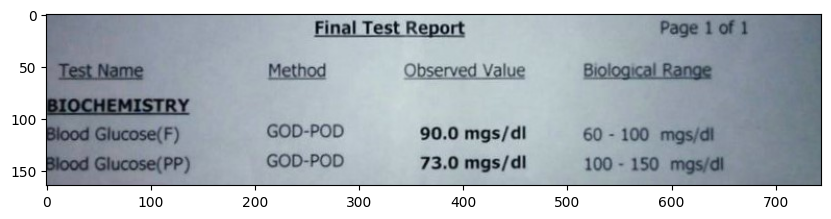

In [44]:
plt.figure(figsize = (10,20))
plt.imshow(img)

In [45]:
text = pytesseract.image_to_string(gray)
print(text)

mm»:

90.0 mos/4|
73.0 nus/4|


# Parse blood glucose level

# Find the number that is most likely to be the blood glucose level

In [35]:
sentences = nltk.sent_tokenize(text.lower()) # Tokenize the text into sentences
number_regex = r'\b\d{2,3}\b' # Define the regular expression for a number
final_numbers = {} # number : priority
for sentence in sentences: # Iterate over the sentences
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    for i in range(len(words)):
        # Check if the word is a 2 or 3 digit number
        if re.match(number_regex, words[i]):
            final_numbers[words[i]] = 1 # gives a priority as 1
print("all numbers found:", str(final_numbers.keys())[11:-2])

all numbers found: '90.0', '73.0'


### Theory 1: the number should not appear more than once in the report 

In [36]:
# Iterate over the keys of the final_numbers dictionary
for number in final_numbers.keys():
    # Find all occurrences of the number in the text
    occurrences = re.findall(r'\b' + number + r'\b', text)
    # The count of the number is the length of the occurrences list
    count = len(occurrences)
    # Print the number and its count
    print(f"The number {number} appears {count} times in the text.")
    # set the priority of the number, based on the count
    p = final_numbers[number]/count
    final_numbers[number] = p

The number 90.0 appears 1 times in the text.
The number 73.0 appears 1 times in the text.


### Theory 2: the number should not be in a range

In [37]:
# Define the regular expression for a range
range_regex = r'\b\d{2,3}\.\d{2}\b - \b\d{2,3}\.\d{2}\b'
# Define the regular expression for a number in a range
number_in_range_regex = r'\b\d{2,3}\.\d{2}\b'
# Find all ranges in the text
ranges = re.findall(range_regex, text)
# Print the ranges
for rang in ranges:
    print(f"A range found: {rang}")
    # Find all numbers in the range
    numbers_in_range = re.findall(number_in_range_regex, rang)
    print(f"Numbers in the range: {numbers_in_range}")
    # reassign the priority of the numbers
    for number in numbers_in_range:
        p = final_numbers[number]/2
        final_numbers[number] = p

In [38]:
# print the final numbers and their priorities
print(final_numbers)

{'90.0': 1.0, '73.0': 1.0}


# Find the blood sugar level

In [39]:
# Find the number with the highest priority
# Initialize the number with the highest priority and its priority
highest_priority_number = None
highest_priority = 0

# Iterate over the final_numbers dictionary
for number, priority in final_numbers.items():
    # If the priority of the current number is higher than the highest priority found so far
    if priority > highest_priority:
        # Update the highest priority and the number with the highest priority
        highest_priority = priority
        highest_priority_number = number

# Print the number with the highest priority
print(f"The number with the highest priority is {highest_priority_number} with a priority of {highest_priority}.")

The number with the highest priority is 90.0 with a priority of 1.0.
